# **Heart Attack Prediction Model**

# Importing Libraries

In [1]:
import pandas as pd
# Read the CSV file
df = pd.read_csv(r'C:\Users\kumar\Downloads/brfss2020.csv', encoding='latin1')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\kumar\Downloads/brfss2020.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Columns: 279 entries, _STATE to _AIDTST4
dtypes: float64(274), int64(5)
memory usage: 855.6 MB


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,1042020,1,4,2020,1100.0,2020000001,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,2072020,2,7,2020,1200.0,2020000002,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1.0,1.0,1232020,1,23,2020,1100.0,2020000003,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1.0,1.0,1092020,1,9,2020,1100.0,2020000004,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1.0,1.0,1042020,1,4,2020,1100.0,2020000005,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [4]:
df_selected = df[['SEXVAR', '_IMPRACE', '_AGE65YR', 'GENHLTH', '_RFBMI5', '_TOTINDA', '_SMOKER3', 'DRNKANY5', 'DIABETE4', 'CVDSTRK3', 'CVDCRHD4', 'CVDINFR4']]
df_selected.head()

,SEXVAR,_IMPRACE,_AGE65YR,GENHLTH,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,DIABETE4,CVDSTRK3,CVDCRHD4,CVDINFR4
0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,2.0,2.0,2.0,3.0,2.0,1.0,9.0,9.0,3.0,2.0,2.0,2.0
2,2.0,2.0,2.0,3.0,9.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0
3,2.0,1.0,2.0,1.0,9.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,3.0,1.0,2.0,2.0


## **Data Cleaning and Exploration**

In [5]:
df_selected.isnull().sum()
df_selected = df_selected.dropna()

**SEXVAR** - Gender Information. 
1 - Male, 
2 - Female. 
Renamed to Gender for better understanding.

<Axes: xlabel='Gender', ylabel='count'>

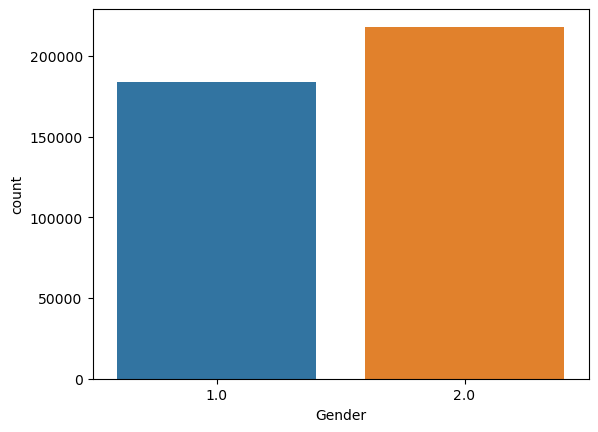

In [6]:
df_selected['SEXVAR'].value_counts()
df_selected = df_selected.rename(columns={"SEXVAR":"Gender"})
sns.countplot(x='Gender', data=df_selected)

**\_IMPRACE** - Race Information.
1 - White, 2 - Black, 3 - Asian, 4 - American Indian/Alaskan Native, 5 - Hispanic, 6 - Other race
Renamed as 'Race'

<Axes: xlabel='Race', ylabel='count'>

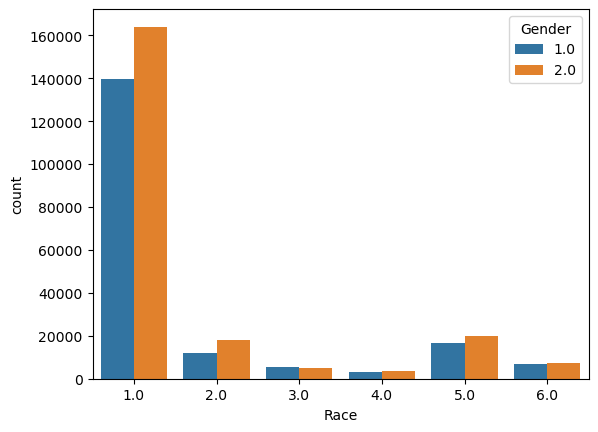

In [7]:
df_selected['_IMPRACE'].value_counts()
df_selected = df_selected.rename(columns={"_IMPRACE":"Race"})
sns.countplot(x='Race', hue='Gender', data=df_selected)

**_AGE65YR** - Age of the participants, 1 - Younger Ones, 2 - Participants aged 65 and older. Renamed as 'Age'.

<Axes: xlabel='Age', ylabel='count'>

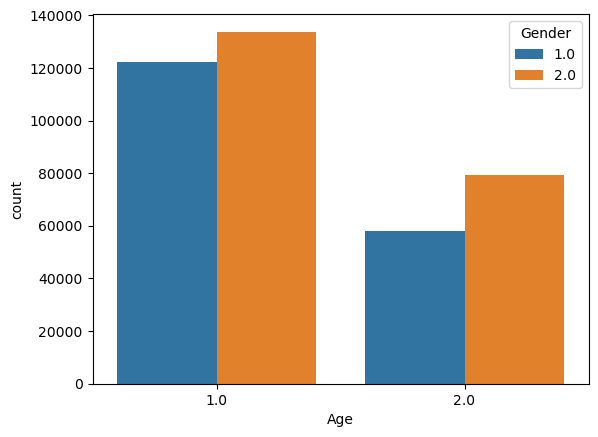

In [8]:
df_selected['_AGE65YR'].value_counts()
df_selected.drop(df_selected[df_selected['_AGE65YR'] == 3].index, inplace = True)
df_selected = df_selected.rename(columns={"_AGE65YR":"Age"})
sns.countplot(x='Age', hue='Gender', data=df_selected)

**GENHLTH** - General health Information. 1 means excellent, 2 - very good, 3 - good, 4 - fair, 5 - poor. Renamed as 'General Health Status' for better understanding.

<Axes: xlabel='General Health Status', ylabel='count'>

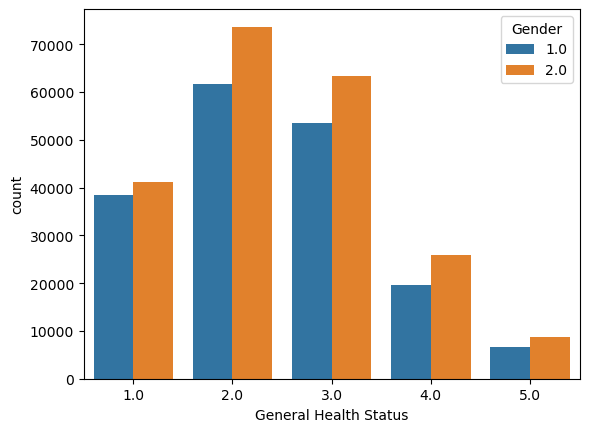

In [9]:
df_selected['GENHLTH'].value_counts()
df_selected = df_selected[(df_selected['GENHLTH'] != 7) & (df_selected['GENHLTH'] != 9)]
df_selected = df_selected.rename(columns={"GENHLTH":"General Health Status"})
sns.countplot(x='General Health Status', hue='Gender', data=df_selected)

**\_RFBMI5** - 1 - BMI score of 25 and below, 2 - BMI score of 25 and above. Renamed as 'Obesity and Overweight Status' for better understanding.

<Axes: xlabel='Obesity and Overweight Status', ylabel='count'>

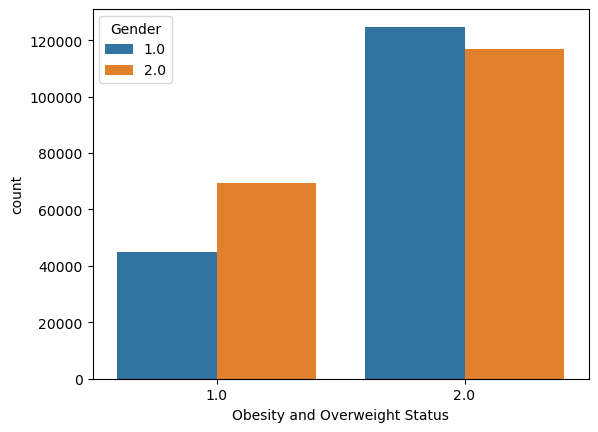

In [10]:
df_selected['_RFBMI5'].value_counts()
df_selected.drop(df_selected[df_selected['_RFBMI5'] == 9].index, inplace = True)
df_selected = df_selected.rename(columns={"_RFBMI5":"Obesity and Overweight Status"})
sns.countplot(x='Obesity and Overweight Status', hue='Gender', data=df_selected)

**_TOTINDA** - Physical activity or exercise. 1 - Done in past 30 days, 2 - Did not do. Renamed as 'Physical Activity Status' for better understanding.

<Axes: xlabel='Physical Activity Status', ylabel='count'>

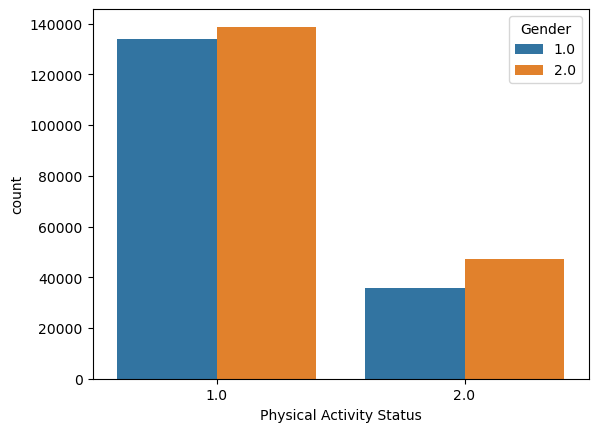

In [11]:
df_selected['_TOTINDA'].value_counts()
df_selected.drop(df_selected[df_selected['_TOTINDA'] == 9].index, inplace = True)
df_selected = df_selected.rename(columns={"_TOTINDA":"Physical Activity Status"})
sns.countplot(x='Physical Activity Status', hue='Gender', data=df_selected)

**\_SMOKER3** - Tobacco usage. 
Since the effects of smoking some days and smoking everyday on heart attack are not very different, these two values were combined and all the variables were renamed.
1 - smoker, 2 - former smoker, 3 - non-smoker.
Renamed as 'Tobacco Usage' for better understanding.

<Axes: xlabel='Tobacco Usage', ylabel='count'>

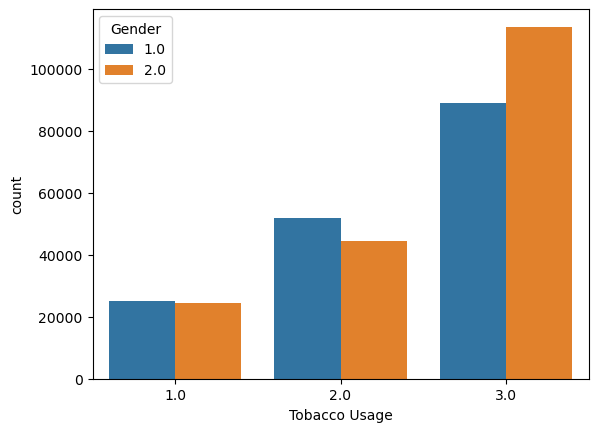

In [12]:
df_selected['_SMOKER3'].value_counts()
df_selected.drop(df_selected[df_selected['_SMOKER3'] == 9].index, inplace = True)
chg = {2 : 1, 3 : 2, 4 : 3}
df_selected['_SMOKER3'].replace(to_replace=chg, inplace=True)
df_selected = df_selected.rename(columns={"_SMOKER3" : "Tobacco Usage"})
sns.countplot(x='Tobacco Usage', hue='Gender', data=df_selected)

**DRNKANY5** - Alcohol Consumption. 1 - Atleast one drink of alcohol in the past 30 days, 2- No Alcohol. Renamed to 'Alcohol Usage'.

<Axes: xlabel='Alcohol Usage', ylabel='count'>

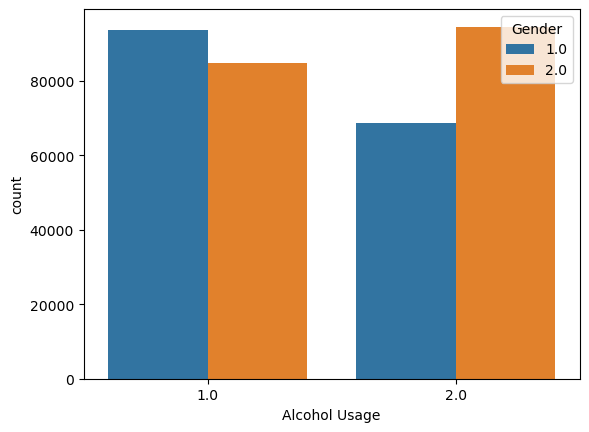

In [13]:
df_selected['DRNKANY5'].value_counts()
df_selected = df_selected[(df_selected['DRNKANY5'] != 7) & (df_selected['DRNKANY5'] != 9)]
df_selected = df_selected.rename(columns={"DRNKANY5":"Alcohol Usage"})
sns.countplot(x='Alcohol Usage', hue='Gender', data=df_selected)

**DIABETE4** - Diabetes.

Since the effects of pregnancy diabetes on heart attack are not very important, they were combined with 'Not Has Diabetes'. On the other hand, since pre-diabetes or borderline diabetes is associated with heart diseases, these were combined with 'Has Diabetes'.

1 - Has Diabetes
2 - Not Has Diabetes

Renamed as 'Diabetes Status'

<Axes: xlabel='Diabetes Status', ylabel='count'>

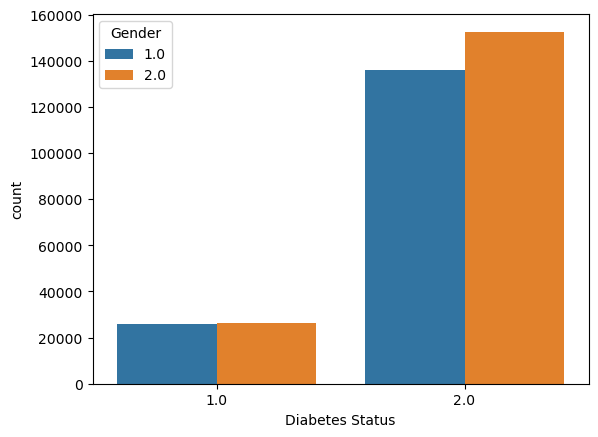

In [14]:
df_selected['DIABETE4'].value_counts()
df_selected = df_selected[(df_selected['DIABETE4'] != 7) & (df_selected['DIABETE4'] != 9)]
chg = {3 : 2, 4 : 1}
df_selected['DIABETE4'].replace(to_replace=chg, inplace = True)
df_selected = df_selected.rename(columns={"DIABETE4":"Diabetes Status"})
sns.countplot(x='Diabetes Status', hue='Gender', data=df_selected)

**CVDSTRK3** - Stroke. 1 -  Had atleast one time in their life. 2-  Did not had it.
Renamed to 'Stroke Status'.

<Axes: xlabel='Stroke Status', ylabel='count'>

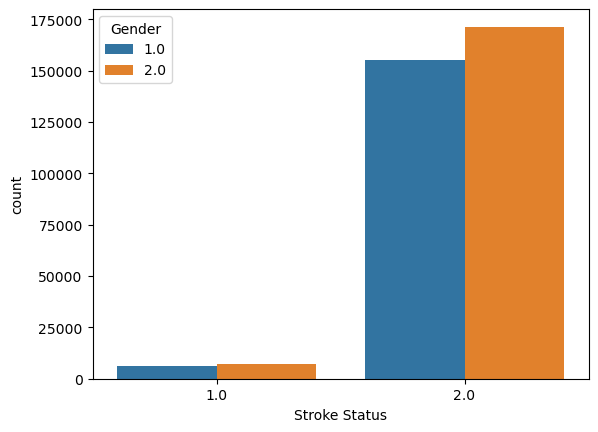

In [15]:
df_selected['CVDSTRK3'].value_counts()
df_selected = df_selected[(df_selected['CVDSTRK3'] != 7) & (df_selected['CVDSTRK3'] != 9)]
df_selected = df_selected.rename(columns={"CVDSTRK3" : "Stroke Status"})
sns.countplot(x='Stroke Status', hue='Gender', data=df_selected)

**CVDCRHD4** - Heart Disease. 1 - Had coronary heart disease. 2 - Did not Had. Renamed to 'Coronary Heart Disease Status'.

<Axes: xlabel='Coronary Heart Disease Status', ylabel='count'>

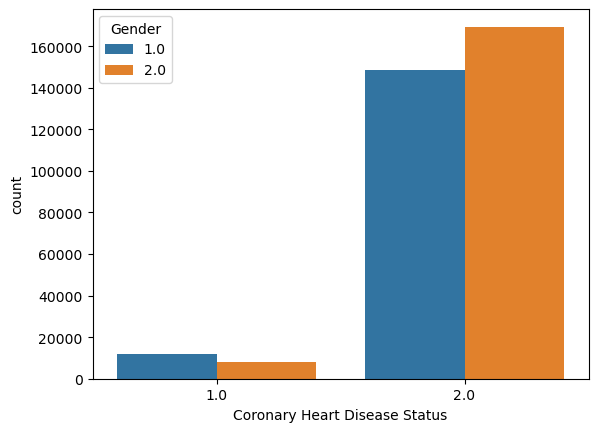

In [16]:
df_selected['CVDCRHD4'].value_counts()
df_selected = df_selected[(df_selected['CVDCRHD4'] != 7) & (df_selected['CVDCRHD4'] != 9)]
df_selected = df_selected.rename(columns={"CVDCRHD4" : "Coronary Heart Disease Status"})
sns.countplot(x='Coronary Heart Disease Status', hue='Gender', data=df_selected)

**CVDINFR4** 1 - Had a heart attack. 2 - Not Had Heart Attack. Renamed to 'Heart Attack Status'.

<Axes: xlabel='Heart Attack Status', ylabel='count'>

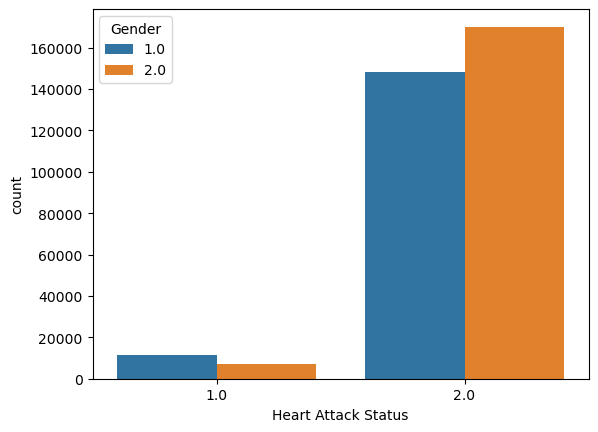

In [17]:
df_selected['CVDINFR4'].value_counts()
df_selected = df_selected[(df_selected['CVDINFR4'] != 7) & (df_selected['CVDINFR4'] != 9)]
chg = {1 : 1, 2 : 2}
df_selected['CVDINFR4'].replace(to_replace=chg, inplace = True)
df_selected = df_selected.rename(columns={"CVDINFR4" : "Heart Attack Status"})
sns.countplot(x='Heart Attack Status', hue='Gender', data=df_selected)

**Last Shape of Data Set**

In [18]:
df_selected.info()
df_selected.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336791 entries, 0 to 401957
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Gender                         336791 non-null  float64
 1   Race                           336791 non-null  float64
 2   Age                            336791 non-null  float64
 3   General Health Status          336791 non-null  float64
 4   Obesity and Overweight Status  336791 non-null  float64
 5   Physical Activity Status       336791 non-null  float64
 6   Tobacco Usage                  336791 non-null  float64
 7   Alcohol Usage                  336791 non-null  float64
 8   Diabetes Status                336791 non-null  float64
 9   Stroke Status                  336791 non-null  float64
 10  Coronary Heart Disease Status  336791 non-null  float64
 11  Heart Attack Status            336791 non-null  float64
dtypes: float64(12)
memory usage: 3

,Gender,Race,Age,General Health Status,Obesity and Overweight Status,Physical Activity Status,Tobacco Usage,Alcohol Usage,Diabetes Status,Stroke Status,Coronary Heart Disease Status,Heart Attack Status
0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0
5,1.0,1.0,2.0,4.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
6,2.0,1.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
8,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0


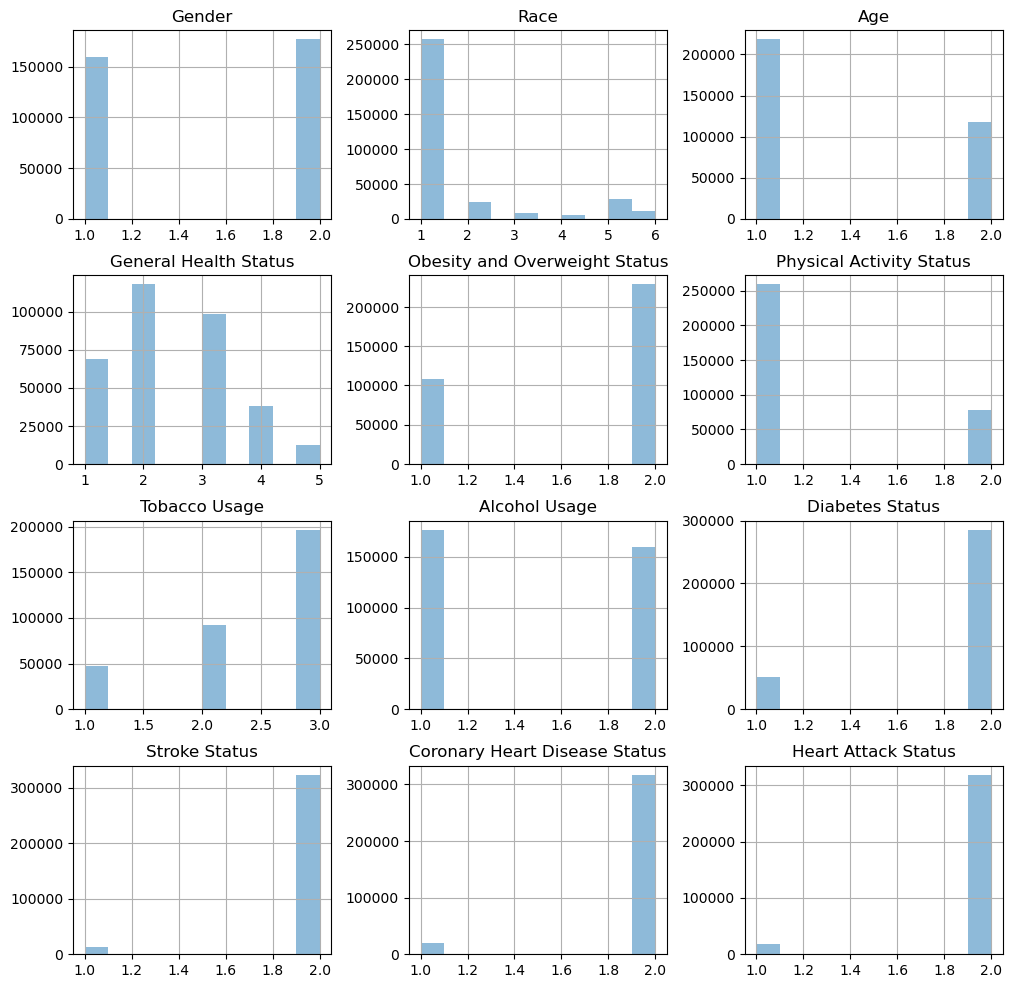

In [19]:
df_selected.hist(alpha=0.5, figsize=(12, 12))
plt.show()

## **Predictive Modelling**

### **Taking Sample From Dataset**

In [20]:
df_sampled = df_selected.sample(frac = 0.1, random_state = 42)
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33679 entries, 317631 to 78672
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         33679 non-null  float64
 1   Race                           33679 non-null  float64
 2   Age                            33679 non-null  float64
 3   General Health Status          33679 non-null  float64
 4   Obesity and Overweight Status  33679 non-null  float64
 5   Physical Activity Status       33679 non-null  float64
 6   Tobacco Usage                  33679 non-null  float64
 7   Alcohol Usage                  33679 non-null  float64
 8   Diabetes Status                33679 non-null  float64
 9   Stroke Status                  33679 non-null  float64
 10  Coronary Heart Disease Status  33679 non-null  float64
 11  Heart Attack Status            33679 non-null  float64
dtypes: float64(12)
memory usage: 3.3 MB


### **Splitting the Dataset as Train and Test Sets**

In [21]:
X = df_sampled.drop(columns=['Heart Attack Status'])
y = df_sampled['Heart Attack Status']

In [22]:
scaled_X = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X = pd.DataFrame(scaled_X, columns=X.columns)
X.head()

,Gender,Race,Age,General Health Status,Obesity and Overweight Status,Physical Activity Status,Tobacco Usage,Alcohol Usage,Diabetes Status,Stroke Status,Coronary Heart Disease Status
0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.50,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,0.25,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.00,0.0,0.0,0.5,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.75,1.0,0.0,0.5,0.0,0.0,1.0,1.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### **K Neighbors Classifier**

**Weights**
'uniform': All points in the neighborhood are given equal weight. Regardless of their distance from the query point, each neighbor contributes equally to the decision.
'distance': Closer neighbors have more influence on the prediction than neighbors that are farther away.

In [24]:
param_grid = {'n_neighbors': np.arange(5, 50),'leaf_size': np.arange(30, 50),'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan']}
knn_rscv = RandomizedSearchCV(KNeighborsClassifier(), param_grid, n_iter = 50, verbose = True, cv = 3, n_jobs = -1, scoring = 'accuracy', return_train_score = True)
knn_rscv.fit(X, y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'leaf_size': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                                        'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [25]:
#Checking top performing n_neighbors value
best_param = knn_rscv.best_params_
print("top performing n_neighbors value", best_param)
#Checking mean score for the top performing value of n_neighbors
knn_rscv.best_score_

top performing n_neighbors value {'weights': 'uniform', 'n_neighbors': 36, 'metric': 'euclidean', 'leaf_size': 42}


0.946079184591086

In [26]:
knn = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'], weights = best_param['weights'], metric = best_param['metric'], leaf_size = best_param['leaf_size']) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [27]:
print(X_test)

       Gender  Race  Age  General Health Status  \
5599      1.0   0.0  0.0                   0.50   
9068      1.0   0.0  0.0                   0.50   
14679     1.0   0.0  0.0                   0.25   
728       0.0   1.0  0.0                   0.50   
28721     0.0   0.0  0.0                   0.75   
...       ...   ...  ...                    ...   
18941     0.0   0.0  0.0                   0.00   
981       0.0   0.0  1.0                   0.50   
29521     0.0   0.0  0.0                   0.25   
21390     1.0   0.0  1.0                   0.00   
14818     1.0   0.0  1.0                   0.00   

       Obesity and Overweight Status  Physical Activity Status  Tobacco Usage  \
5599                             1.0                       1.0            1.0   
9068                             1.0                       0.0            1.0   
14679                            1.0                       0.0            1.0   
728                              1.0                       0.0 

In [28]:
accuracy = accuracy_score(y_test.values, y_pred)
print(f"Accuracy of model: {accuracy}\n")
print(classification_report(y_test, y_pred))

Accuracy of model: 0.9468527315914489

              precision    recall  f1-score   support

         1.0       0.61      0.19      0.29       577
         2.0       0.95      0.99      0.97      9527

    accuracy                           0.95     10104
   macro avg       0.78      0.59      0.63     10104
weighted avg       0.93      0.95      0.93     10104



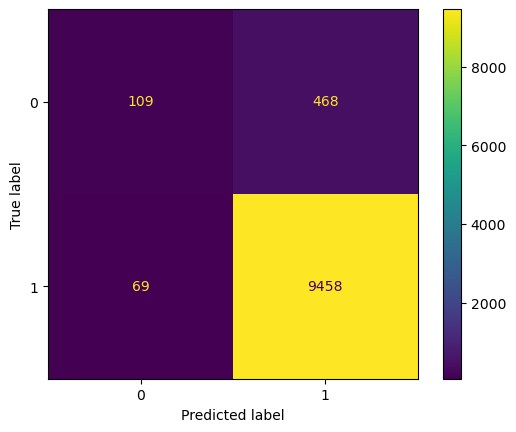

In [29]:
knn_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = knn_cm)
disp.plot()

In [30]:
result = knn.predict([[1.0,0.0,0.0,0.50,1.0,1.0,1.0,0.0,1.0,1.0,1.0]])
if result==1:
    print("Don't panic, try to consult a cardiolagist")
else:
    print("Congratulations, You are healthy")

Congratulations, You are healthy


## **Results**

The scores of precision and recall to heart attack prediction show us that something is wrong. Also, f1 score confirm this. The reason for this problem may be the large difference between the number of people who have had a heart attack and those who have not.